# Tutorial on Ternary Plots

In [1]:
import poisson_approval as pa

Poisson Approval relies on the package ``python-ternary`` to draw plots on the simplex where points have 3 coordinates summing to 1. The coordinates of a point are denoted ``right``, ``top`` and ``left`` because they are respectively equal to 1 at the right, top and left corners of the triangular figure. They typically represent shares of different types in a profile. For example:

In [2]:
def profile_divided_majority(right, top, left):
    return pa.ProfileDiscrete({
        ('abc', 0.5): top, ('bac', 0.5): left, ('cab', 0.5): right})

## Intensity Heat Map

First, we define a function that inputs a point of the simplex and outputs a number. Typically, the output may represent a number of equilibria, possible winners, etc.

In [3]:
def n_bloc_equilibria(right, top, left):
    """
    Input: shares for each of the types ('abc', 0.5), ('bac', 0.5), and ('cab', 0.5).
    
    Output: number of bloc equilibria (where all voters of the same type have the same ballot).
    """
    profile = profile_divided_majority(right, top, left)
    return len(profile.analyzed_strategies.equilibria)

Then we draw a heat map:

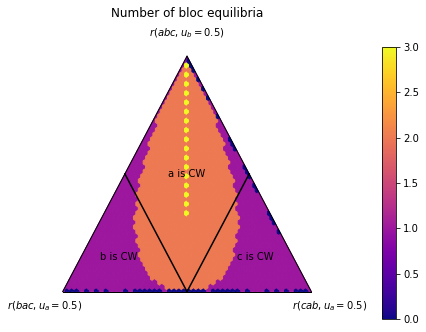

In [4]:
figure, tax = pa.ternary_figure(scale=51)
tax.heatmap_intensity(n_bloc_equilibria, 
                      right_label='$r(cab, u_a = 0.5)$',
                      top_label='$r(abc, u_b = 0.5)$',
                      left_label='$r(bac, u_a = 0.5)$')
tax.annotate_condorcet(right_ranking='cab', top_ranking='abc', left_ranking='bac')
tax.set_title_padded('Number of bloc equilibria')

## Candidates Heat Map

Now, we define a function that inputs a point of the simplex and outputs a result in $[0, 1]^3$ (not necessarily in the simplex). Typically, the 3 coordinates of the output are respectively associated to candidates `a`, `b` and `c` (e.g. winning probabilities for each of them).

In [5]:
def winners_at_equilibrium(right, top, left):
    profile = profile_divided_majority(right, top, left)
    return pa.candidates_to_probabilities(profile.winners_at_equilibrium)

Then we draw a heat map:

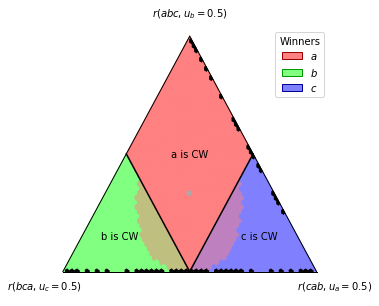

In [6]:
figure, tax = pa.ternary_figure(scale=51)
tax.heatmap_candidates(winners_at_equilibrium, 
                       right_label='$r(cab, u_a = 0.5)$',
                       top_label='$r(abc, u_b = 0.5)$',
                       left_label='$r(bca, u_c = 0.5)$',
                       legend_title='Winners')
tax.annotate_condorcet('cab', 'abc', 'bac')

Another typical example, representing the result of fictitious play:

In [7]:
def winning_frequencies(right, top, left):
    """
    Input: shares for each of the types ('abc', 0.5), ('bca', 0.5), and ('cab', 0.5).

    Output: the winning frequencies of each candidate in fictitious play, initialized
    with sincere voting.
    """
    profile = profile_divided_majority(right, top, left)
    strategy = pa.StrategyOrdinal({'abc': 'a', 'bac': 'b', 'cab': 'c'})
    results = profile.fictitious_play(strategy_ini=strategy, n_max_episodes=100,
                                      perception_update_ratio=pa.one_over_log_t_plus_two,
                                      ballot_update_ratio=pa.one_over_log_t_plus_two)
    return pa.d_candidate_value_to_array(results['d_candidate_winning_frequency'])

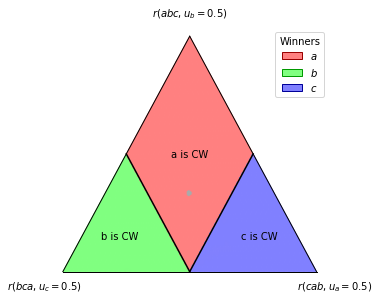

In [8]:
figure, tax = pa.ternary_figure(scale=51)
tax.heatmap_candidates(winning_frequencies,
                       right_label='$r(cab, u_a = 0.5)$',
                       top_label='$r(abc, u_b = 0.5)$',
                       left_label='$r(bca, u_c = 0.5)$',
                       legend_title='Winners')
tax.annotate_condorcet('cab', 'abc', 'bac')

## Customize the plot

Grid and lines:

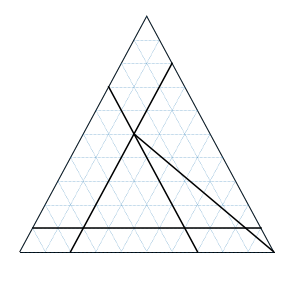

In [9]:
figure, tax = pa.ternary_figure()
tax.gridlines_simplex(multiple=0.1)
tax.horizontal_line_simplex(0.1)
tax.left_parallel_line_simplex(0.2)
tax.right_parallel_line_simplex(0.3)
tax.line_simplex((1, 0, 0), (0.2, 0.5, 0.3))

Titles and annotations:

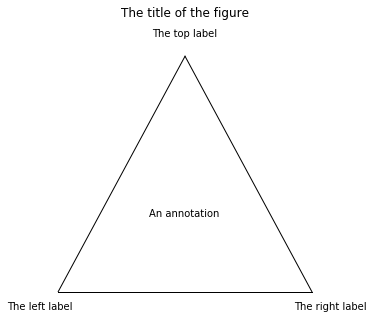

In [10]:
figure, tax = pa.ternary_figure()
tax.set_title_padded('The title of the figure')
tax.right_corner_label('The right label')
tax.top_corner_label('The top label')
tax.left_corner_label('The left label')
tax.annotate_simplex('An annotation', (0.33, 0.33, 0.33))